# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



## 1. Importación de librerías y carga del dataset préviamente descargado

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Cargamos el dataset
df = pd.read_csv('titanic.csv')

## 2. Descripción del dataset

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 2.1. Descripción de las columnas
- **PassengerId:** un identificador único asignado a cada pasajero. 
- **Survived:** Indica si un pasajero sobrevivió (1) o murió (0).
- **Pclass:** representa la clase del pasajero, que puede ser un valor numérico o categórico que indica la clase de viaje (por ejemplo, primera, segunda o tercera clase).
- **Name:** El nombre del pasajero.
- **Sex:** representa el género del pasajero, generalmente categorizado como hombre o mujer.
- **Age:** La edad del pasajero, a menudo representada como un valor numérico.
- **SibSp:** Indica el número de hermanos o cónyuges que viajan con el pasajero.
- **Parch:** Representa el número de padres o hijos que viajan con el pasajero.
- **Ticket:** El número de boleto asociado con el boleto del pasajero.
- **TFare:** La cantidad de dinero gastada en el billete.
- **Cabin:** Representa la categoría o número de cabina asignado al pasajero, si está disponible.
- **Embarked:** indica el puerto desde donde embarcó el pasajero, generalmente representado por un código de un solo carácter (por ejemplo, C para Cherburgo, Q para Queenstown, S para Southampton).


In [3]:
#Sacamos los nombres de las columnas numericas y categoricas
def tipo_de_columnas_ordenadas (df):
    cat = []
    num = []
        
    for col in df.columns:
        if(df[col].dtype == "object"):
            cat.append(col)
        else:
            num.append(col)

    return cat , num

cat , num = tipo_de_columnas_ordenadas(df)
print("Las columnas categoricas son: ", cat)
print("Las columnas numericas son: ", num)

Las columnas categoricas son:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Las columnas numericas son:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## 3. Visualización inicial de datos

#### 3.1. Gráficas para variables numéricas

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig = make_subplots(rows=3, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    row = (i // 3) + 1
    col_pos = (i % 3) + 1
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=f'Distribución de {col}'), row=row, col=col_pos)
    

fig.update_layout(height=750, width=1500, title_text="Distribución de Variables", showlegend=False)
fig.update_layout(template='plotly_dark')
fig.show()



#### 3.2. Gráficas para variables categóricas

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(go.Histogram(x=df[cols[i]], nbinsx=20, name=f'Distribución de {cols[i]}'), row=row, col=col)

fig.update_yaxes(showticklabels=False, row=3, col=3)

# Ocultar etiquetas del eje x para el primer, tercer y cuarto gráfico para que no solapen
fig.update_xaxes(showticklabels=False, row=1, col=1)  # Primer gráfico
fig.update_xaxes(showticklabels=False, row=1, col=3)  # Tercer gráfico
fig.update_xaxes(showticklabels=False, row=2, col=1)  # Cuarto gráfico

fig.update_layout(height=750, width=1500, title_text="Distribución de Variables", showlegend=False,)
fig.update_xaxes(tickangle=45)
fig.update_layout(template='plotly_dark')
fig.show()


## 4. Preprocesamiento de datos 

#### 4.1. Tratamiento de valores nulos y duplicados

<Axes: >

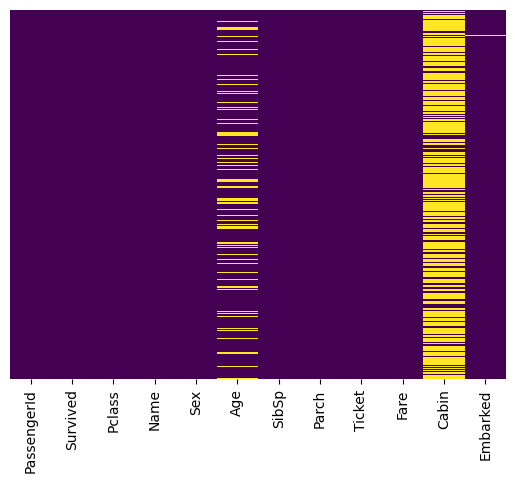

In [6]:
# Comprobamos gráficamente si hay valores nulos
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.duplicated().sum()

0

##### 4.1.2. Variable 'Age' ⏳

##### 4.1.2.1. Relleno de valores nulo usando la mediana

In [6]:
# En la variable 'Age' usamos la mediana para rellenar los valores nulos ya que se trata de una variable discreta, aunque comprobamos que hay numeros decimales que deberíamos redondear.
df['Age'].unique()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'] = df['Age'].round(0)

In [7]:
df['Age'].unique() # Observamos que hay algún 'bebé a bordo' que al redondear la edad ha pasado a tener 0 años, lo que no tiene sentido. Por lo que vamos a cambiar los valores de 0 años por 1 año.
df.loc[df['Age'] == 0, 'Age'] = 1

# Convertimos la variable 'Age' a tipo entero
df['Age'] = df['Age'].astype(int)

##### 4.1.2.2. Relleno de valores nulo usando KNN

In [6]:
df_knn_age = pd.read_csv('titanic.csv')

In [7]:
df_knn_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Cargar los datos
df_knn_age = pd.read_csv('C:/Users/Usuario/Documents/Bcas/UPGRADE/UPGRADE_VS/Temario/Modulo1/00_Proyecto_modulo1/Titanic_project/titanic.csv')

# Imputamos valores nulos en 'Embarked' con la moda 
df_knn_age['Embarked'] = df_knn_age['Embarked'].fillna(df_knn_age['Embarked'].mode()[0])

# Codificamos variables categóricas
df_knn_age['Sex'] = LabelEncoder().fit_transform(df_knn_age['Sex'])
df_knn_age['Embarked'] = LabelEncoder().fit_transform(df_knn_age['Embarked'])

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_not_null = df_knn_age[df_knn_age['Age'].notna()]

# Definimos características y objetivo
X_train = df_not_null[features]
y_train = df_not_null['Age']

# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Creamos y entrenamos el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

df_null = df_knn_age[df_knn_age['Age'].isna()]

X_test = df_null[features]

# Escalamos características
X_test_scaled = scaler.transform(X_test)

# Predecimos los valores de 'Age' faltantes
age_predictions = knn.predict(X_test_scaled)
age_predictions_rounded = np.round(age_predictions).astype(int)

# Rellenamos los valores nulos de 'Age' con las predicciones redondeadas
df_knn_age.loc[df_knn_age['Age'].isna(), 'Age'] = age_predictions_rounded


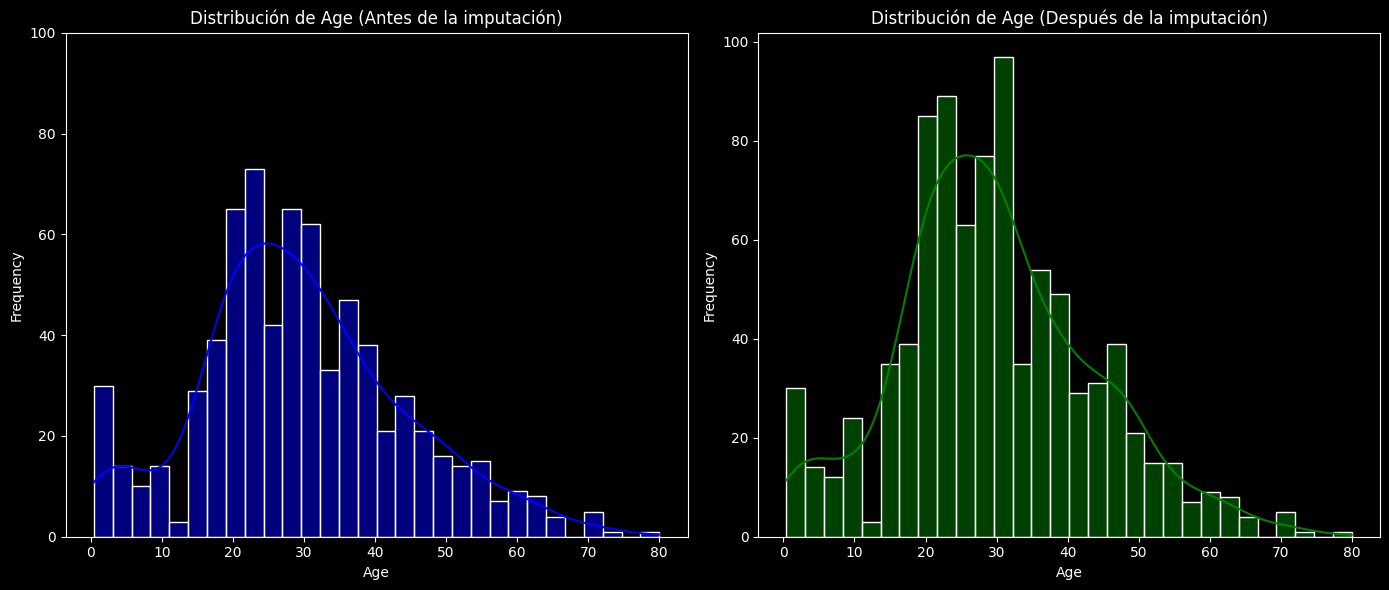

In [18]:
# Guardar copia del dataframe para visualización antes de imputación
df_before_imputation = pd.read_csv('C:/Users/Usuario/Documents/Bcas/UPGRADE/UPGRADE_VS/Temario/Modulo1/00_Proyecto_modulo1/Titanic_project/titanic.csv')

# Visualización de la distribución de Age antes de la imputación
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_before_imputation['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribución de Age (Antes de la imputación)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ylim(0, 100)  # Ajustar el eje Y para que llegue hasta 100

# Visualización de la distribución de Age después de la imputación
plt.subplot(1, 2, 2)
sns.histplot(df_knn_age['Age'], kde=True, bins=30, color='green')
plt.title('Distribución de Age (Después de la imputación)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### 4.1.2. Variable 'Embarked' ⚓

Ruta de embarque del Titanic:

![Ruta del Titanic](https://upload.wikimedia.org/wikipedia/commons/a/af/TitanicRoute.svg)


In [10]:
# En la variable 'Embarked', al ser una variable categórica rellenamos los valores faltantes por su moda
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Además procedemos a pasar a numérico sus valores para que sean más fácil de tratar
df["Embarked"] = df["Embarked"].replace({"S": 1, "C": 2, "Q": 3})


In [11]:

df_knn_age["Embarked"] = df_knn_age["Embarked"].replace({2: 1, 0: 2, 1: 3})

In [119]:
df_knn_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [62]:
df["Embarked"].unique()

array([1, 2, 3], dtype=int64)

##### 4.1.3. Variable 'Sex' ⚤

In [12]:
# Convertimos la variable a numérica 
df['Sex'] = df['Sex'].replace({'male':1, 'female':0})

In [13]:
df_knn_age['Sex'] = df_knn_age['Sex'].replace({'male':1, 'female':0})

### 4.2. Procesado de la variable 'Name'

Observando la variable 'Name' nos fijamos que cada persona recibe un tratamiento antes del nombre y seguido de '.' , por ejemplo 'Mr.' o 'Mrs'.

Vamos a sustraer esos tratamientos en una nueva columna para ver que información de status podemos obtener.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_63984\2162455023.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




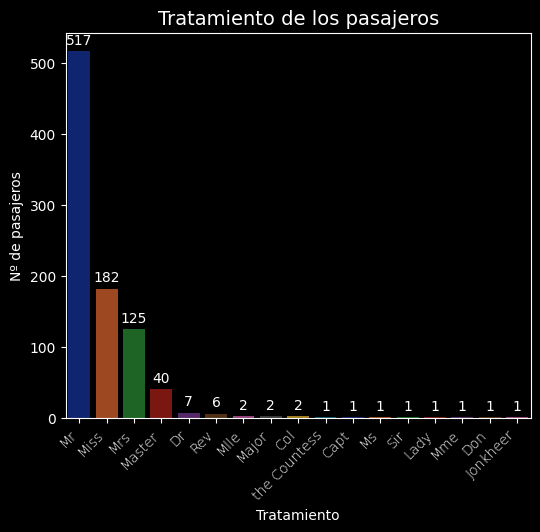

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Extraemos los tratamientos para mirar de identificar títulos 
df_knn_age['Tratamiento'] = df_knn_age['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip(' ')

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Tratamiento', data=df_knn_age, palette="dark", order=df_knn_age['Tratamiento'].value_counts().index)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')

plt.title('Tratamiento de los pasajeros', fontsize=14, color='white')
plt.ylabel('Nº de pasajeros', color='white')
plt.xlabel('Tratamiento', color='white')

labels = df_knn_age['Tratamiento'].value_counts()

# Añadimos los números sobre las barras
for i, v in enumerate(labels): ax.text(i, v + 10, str(v), horizontalalignment='center', size=10, color='white')


ax.tick_params(colors='white', which='both')  
ax.spines['bottom'].set_color('white')  
ax.spines['left'].set_color('white')  

plt.show()


In [15]:
# Agrupamos en función del título en un diccionario vacío

title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

df_knn_age['Titulo'] = df_knn_age['Tratamiento'].map(title_dict)

## 5. Análisis y visualización

#### 5.1. Correlación de variables

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33848\2915521110.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_knn_age.corr(), annot=True, cmap='coolwarm', linewidths=0.5,


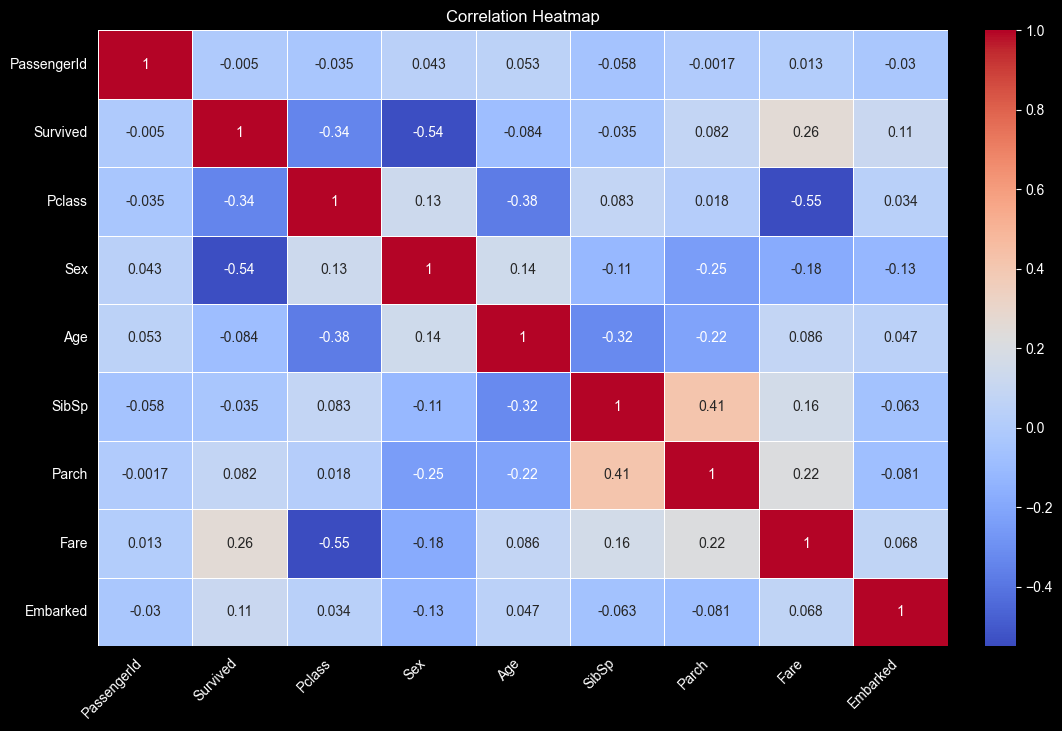

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos oscuro
plt.style.use('dark_background')

# hacemos un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_knn_age.corr(), annot=True, cmap='coolwarm', linewidths=0.5,
            cbar_kws={'orientation': 'vertical', 'fraction': 0.046, 'pad': 0.04})

plt.title('Correlation Heatmap', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(rotation=0, color='white')
plt.show()



#### 5.2. Variable 'Survived' 💀❤️

##### 5.2.1. Variable 'Survived' relacionada con el género 

In [16]:
df_Gender_Pclass = df_knn_age.copy()

df_Gender_Pclass['Sex'] = df_knn_age['Sex'].replace({1: 'male', 0: 'female'})
df_Gender_Pclass['Pclass'] = df_knn_age['Pclass'].replace({1:'1st Class', 2:'2nd Class', 3:'3rd Class'})

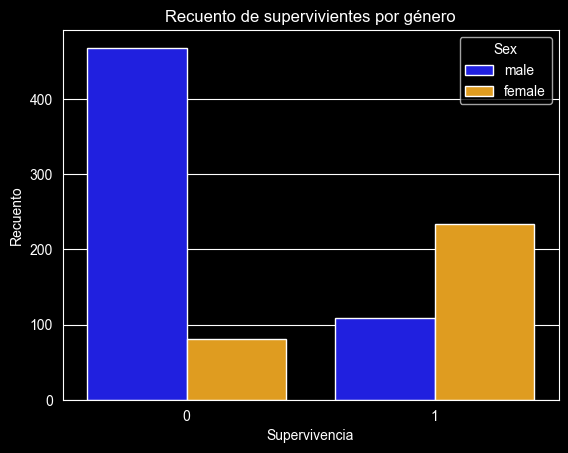

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', hue='Sex', data=df_Gender_Pclass, palette={'male': 'blue', 'female': 'orange'})

plt.title('Recuento de supervivientes por género')
plt.xlabel('Supervivencia')
plt.ylabel('Recuento')

plt.show()



##### 5.2.2. Relación de supervivencia en función de la edad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33848\794909988.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Sobrevivio['Age'], color='blue', label='Sobrevivió', shade=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33848\794909988.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=No_sobrevivio['Age'], color='orange', label='No sobrevivió', shade=True)


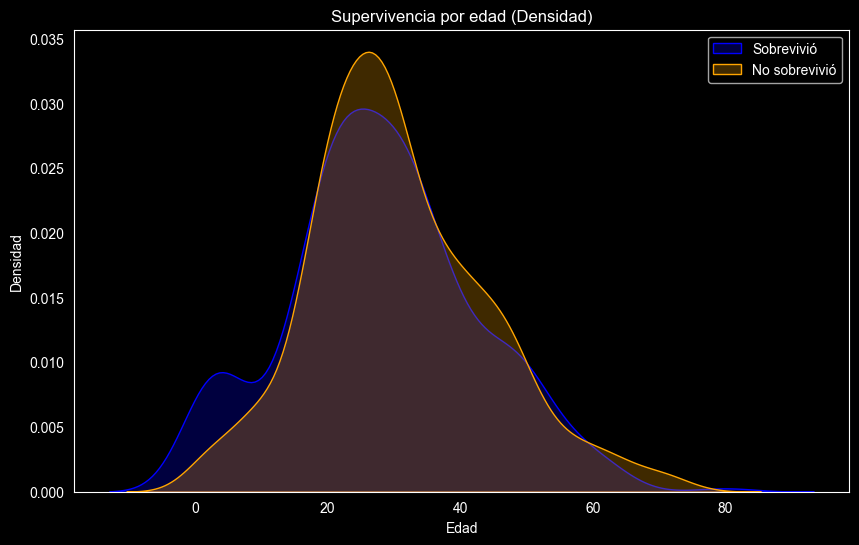

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


Sobrevivio = df_knn_age[df_knn_age['Survived'] == 1]
No_sobrevivio = df_knn_age[df_knn_age['Survived'] == 0]

plt.figure(figsize=(10, 6))


sns.kdeplot(data=Sobrevivio['Age'], color='blue', label='Sobrevivió', shade=True)
sns.kdeplot(data=No_sobrevivio['Age'], color='orange', label='No sobrevivió', shade=True)

plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Supervivencia por edad (Densidad)')
plt.grid(False)
plt.legend()
plt.show()



*Vemos que la variable Survived está relacionada con las variables 'Sex' y 'Pclass', vamos a visualizarlo. Además trataremos de relacionarla con otras variables*

##### 5.2.3. Variable 'Survived' relacionada con el género y la edad

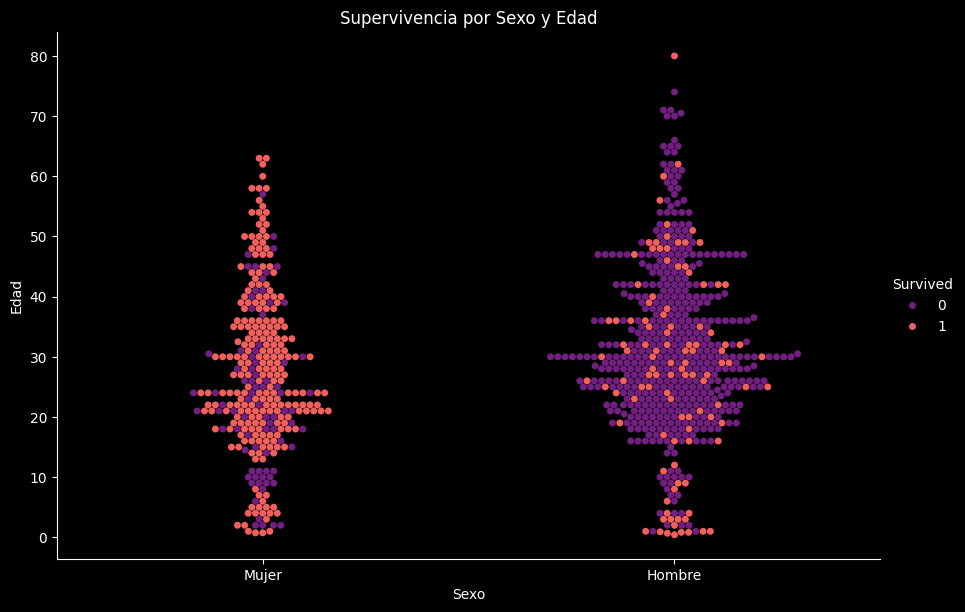

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un catplot
sns.catplot(data=df_knn_age, x='Sex', y='Age', hue='Survived', kind='swarm', 
            palette='magma', height=6, aspect=1.5)

plt.title('Supervivencia por Sexo y Edad')
plt.xlabel('Sexo')
plt.ylabel('Edad')

plt.xticks(ticks=[0, 1], labels=['Mujer', 'Hombre'])

plt.show()




##### 5.2.4. Variable 'Survived' relacionada con las clases 'Pclass' y 'Sex'

In [25]:
survival_rates = df_Gender_Pclass.groupby(['Pclass','Sex'])['Survived'].mean()
print(survival_rates)



Pclass     Sex   
1st Class  female    0.968085
           male      0.368852
2nd Class  female    0.921053
           male      0.157407
3rd Class  female    0.500000
           male      0.135447
Name: Survived, dtype: float64


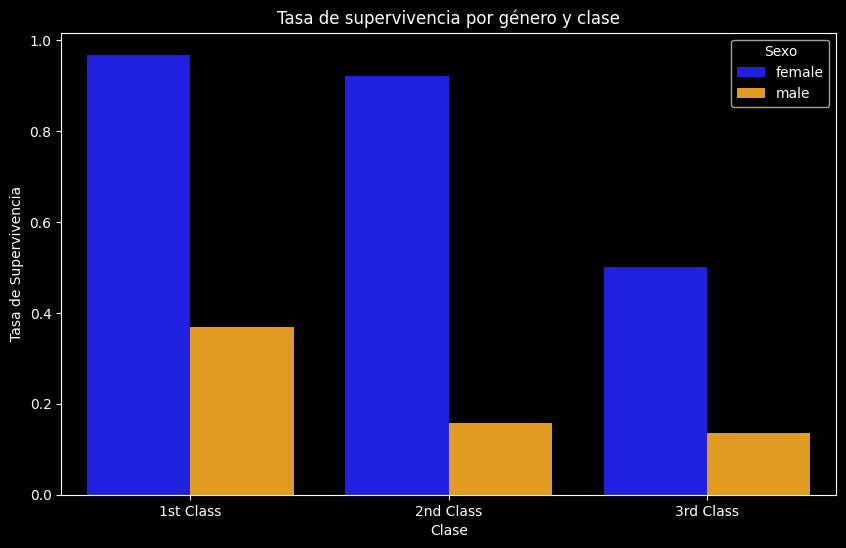

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos tasa  supervivencia por género y clase
survival_rates = df_Gender_Pclass.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates, x='Pclass', y='Survived', hue='Sex', palette={'male': 'orange', 'female': 'blue'})

plt.title('Tasa de supervivencia por género y clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia')
plt.xticks(ticks=[0, 1, 2], labels=['1a Clase', '2a Clase', '3a Clase'])

plt.legend(title='Sexo')
plt.show()


##### 5.2.5. Como se relaciona la variable 'Survived' con el puerto donde embarcaron 'embarked'.

In [129]:
df_Embarked2 = df_knn_age.copy()
df_Embarked2['Embarked'] = df_knn_age['Embarked'].replace({1: 'Southampton', 2: 'Cherbourg', 3: 'Queenstown'})


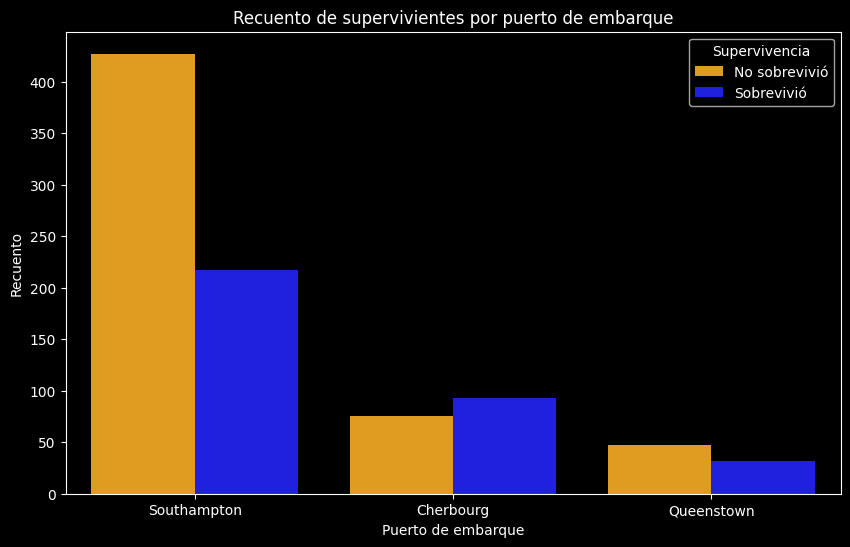

In [180]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_Embarked2, x='Embarked', hue='Survived', palette={0: 'orange', 1: 'blue'})
plt.title('Recuento de supervivientes por puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Recuento')
plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])

plt.show()


##### 5.2.6. Como se relaciona la variable 'Survived' con la tarifa y la clase

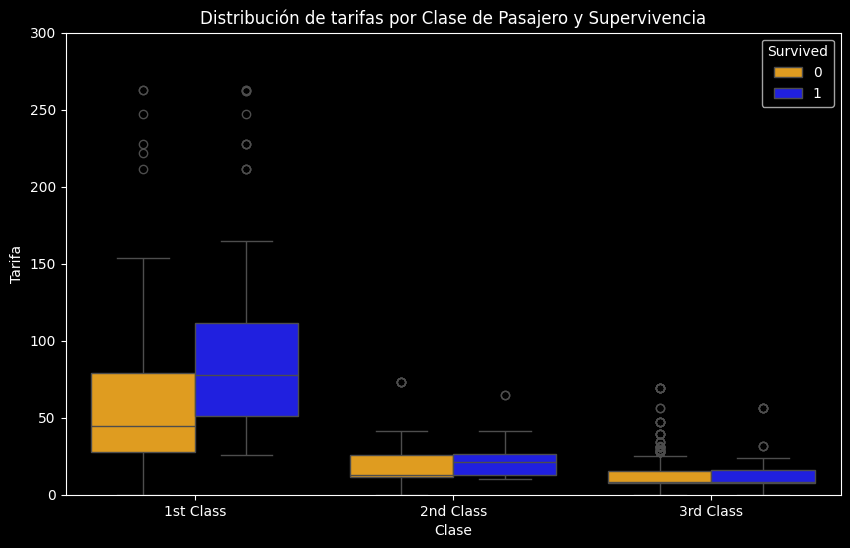

In [174]:

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_Gender_Pclass, x='Pclass', y='Fare', hue='Survived', 
            palette={0: 'orange', 1: 'blue'})
plt.ylim(0, 300)  
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.title('Distribución de tarifas por Clase de Pasajero y Supervivencia')

plt.show()


##### 5.2.7. Variable 'Survived' relacionada con el tamaño de família

In [21]:
import pandas as pd

# Creaamos columnas'Family_size' sumando 'SibSp' y 'Parch' y añadiendo 1 para sumar el propio pasajero
df_knn_age['Family_size'] = df_knn_age['SibSp'] + df_knn_age['Parch'] + 1

family_size = df_knn_age['Family_size'].value_counts()

print('Tamaño de la familia y número de pasajeros:')
print(family_size)



Tamaño de la familia y número de pasajeros:
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64
                                                Name  Family_size
0                            Braund, Mr. Owen Harris            2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...            2
2                             Heikkinen, Miss. Laina            1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)            2
4                           Allen, Mr. William Henry            1


Parece extraño que haya tantas familias de 11,8, 7 miembros. Vamos a analizar si hay algún error separando por el apellido de la familia.

In [22]:
df_knn_age['Surname'] = df_knn_age['Name'].str.split(',', expand = True)[0]

In [28]:
# Agrupamos por familia y ticket para ver si pagaron tarifa conjunta
df_knn_age[(df_knn_age['Family_size'] == 7) & (df_knn_age['Surname']=='Andersson')].Ticket.value_counts()

347082     7
3101281    1
Name: Ticket, dtype: int64

In [31]:
# vemos que hay un pasajero que tiene otra tarifa con lo que no podemos asegurar que sean familiares, corregimos datos
df_knn_age.loc[df_knn_age['PassengerId'] == 69, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]

In [24]:
df_knn_age[df_knn_age['Family_size'] == 11]['Surname'].value_counts()

Sage    7
Name: Surname, dtype: int64

In [36]:
df_knn_age[(df_knn_age['Family_size'] == 11) & (df_knn_age['Surname']=='Sage')].Ticket.value_counts()

CA. 2343    7
Name: Ticket, dtype: int64

In [37]:
df_knn_age[(df_knn_age['Ticket'] == 'CA. 2343')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tratamiento,Titulo,Family_size,Surname
159,160,0,3,"Sage, Master. Thomas Henry",1,10.0,8,2,CA. 2343,69.55,NaN,1,Master,Master,11,Sage
180,181,0,3,"Sage, Miss. Constance Gladys",0,10.0,8,2,CA. 2343,69.55,NaN,1,Miss,Miss,11,Sage
201,202,0,3,"Sage, Mr. Frederick",1,10.0,8,2,CA. 2343,69.55,NaN,1,Mr,Mr,11,Sage
324,325,0,3,"Sage, Mr. George John Jr",1,10.0,8,2,CA. 2343,69.55,NaN,1,Mr,Mr,11,Sage
792,793,0,3,"Sage, Miss. Stella Anna",0,10.0,8,2,CA. 2343,69.55,NaN,1,Miss,Miss,11,Sage
846,847,0,3,"Sage, Mr. Douglas Bullen",1,10.0,8,2,CA. 2343,69.55,NaN,1,Mr,Mr,11,Sage
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,10.0,8,2,CA. 2343,69.55,NaN,1,Miss,Miss,11,Sage


Parece que realmente si que hubo una familia de 11 miembros en Titanic y además no pudieron escapar con vida.

In [25]:
df_knn_age[df_knn_age['Family_size'] == 8]['Surname'].value_counts()

Goodwin    6
Name: Surname, dtype: int64

In [38]:
df_knn_age[(df_knn_age['Family_size'] == 8) & (df_knn_age['Surname']=='Goodwin')].Ticket.value_counts()

CA 2144    6
Name: Ticket, dtype: int64

In [39]:
df_knn_age[(df_knn_age['Ticket'] == 'CA 2144')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tratamiento,Titulo,Family_size,Surname
59,60,0,3,"Goodwin, Master. William Frederick",1,11.0,5,2,CA 2144,46.9,NaN,1,Master,Master,8,Goodwin
71,72,0,3,"Goodwin, Miss. Lillian Amy",0,16.0,5,2,CA 2144,46.9,NaN,1,Miss,Miss,8,Goodwin
386,387,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,CA 2144,46.9,NaN,1,Master,Master,8,Goodwin
480,481,0,3,"Goodwin, Master. Harold Victor",1,9.0,5,2,CA 2144,46.9,NaN,1,Master,Master,8,Goodwin
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",0,43.0,1,6,CA 2144,46.9,NaN,1,Mrs,Mrs,8,Goodwin
683,684,0,3,"Goodwin, Mr. Charles Edward",1,14.0,5,2,CA 2144,46.9,NaN,1,Mr,Mr,8,Goodwin


Lo mismo pasó con la familia Goodwin

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33848\607480012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_knn_age, x='Family_size', ax=ax1, palette='viridis')


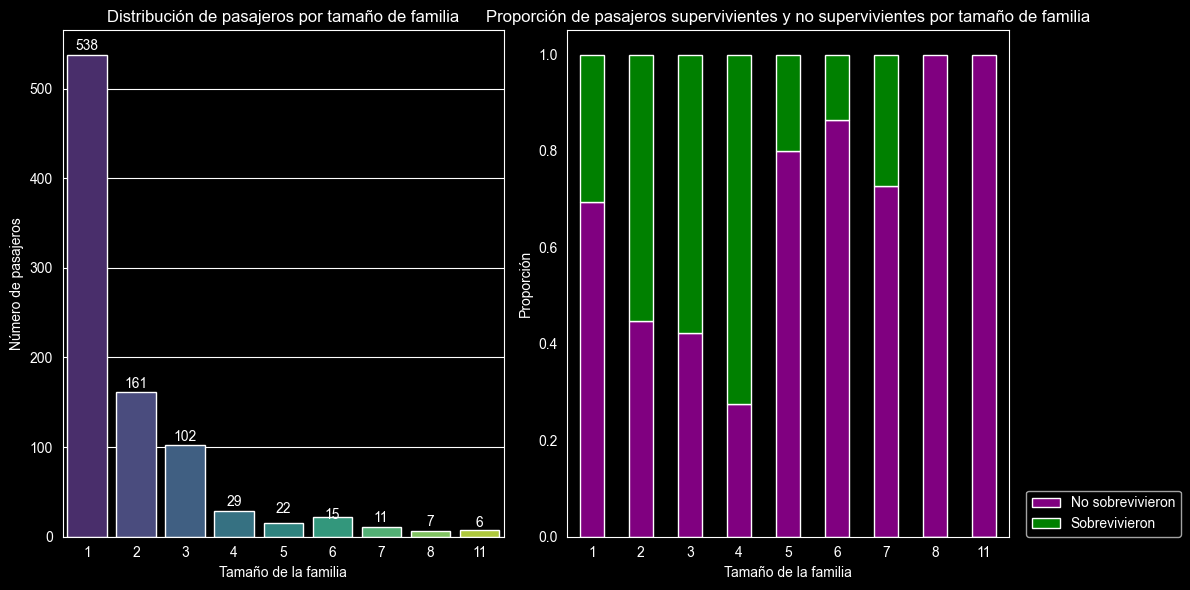

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('dark_background')
fig = plt.figure(figsize=(12, 6))

# Gráfico 1: Pasajeros por tamaño de familia
ax1 = fig.add_subplot(121)
ax = sns.countplot(data=df_knn_age, x='Family_size', ax=ax1, palette='viridis')
labels = df_knn_age['Family_size'].value_counts()

for i, v in enumerate(labels):
    ax.text(i, v + 5, str(v), horizontalalignment='center', size=10, color='white')

ax.set_title('Pasajeros por tamaño de familia')
ax.set_ylabel('Número de pasajeros')
ax.set_xlabel('Tamaño de la familia')

# Gráfico 2: Supervivientes y no supervivientes por tamaño de familia
ax2 = fig.add_subplot(122)
d = df_knn_age.groupby('Family_size')['Survived'].value_counts(normalize=True).unstack()
d.plot(kind='bar', stacked=True, color=["purple", "green"], ax=ax2)

ax2.set_title('Supervivientes y no supervivientes por tamaño de familia')
ax2.legend(('No sobrevivieron', 'Sobrevivieron'), loc=(1.04, 0))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel('Tamaño de la familia')
ax2.set_ylabel('Proporción')

plt.tight_layout()
plt.grid(False)
plt.show()


##### 5.2.8. Variable 'Survived' en relación con el título

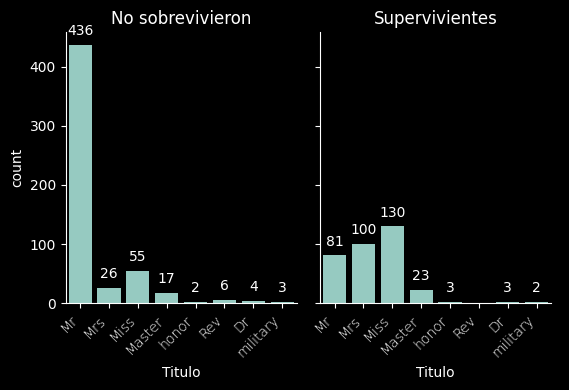

In [246]:

import seaborn as sns
import matplotlib.pyplot as plt

category_survived = sns.catplot(x="Titulo", col="Survived", data=df_knn_age, kind="count", height=4, aspect=.7)

category_survived.set_xticklabels(rotation=45, horizontalalignment='right',)

for ax in category_survived.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

titles = ['No sobrevivieron', 'Supervivientes']
for ax, title in zip(category_survived.axes.flat, titles):
    ax.set_title(title)

plt.tight_layout()
plt.show()


#### 5.3. Variable 'Pclass' 🎩

##### 5.3.1. Variable Clase y Edad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12756\2945327060.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




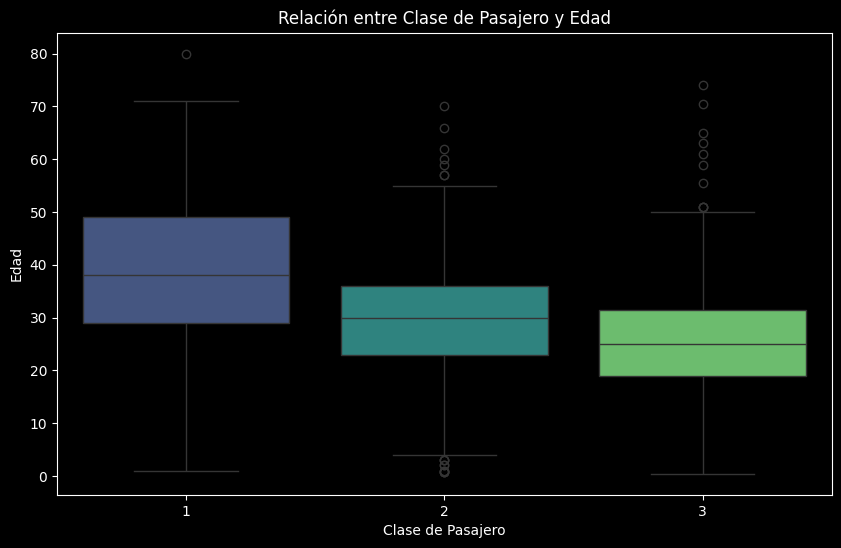

In [181]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_knn_age, x='Pclass', y='Age', palette='viridis')

plt.title('Relación entre Clase de Pasajero y Edad')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Edad')

plt.show()


##### 5.3.2. Variable Clase y Título

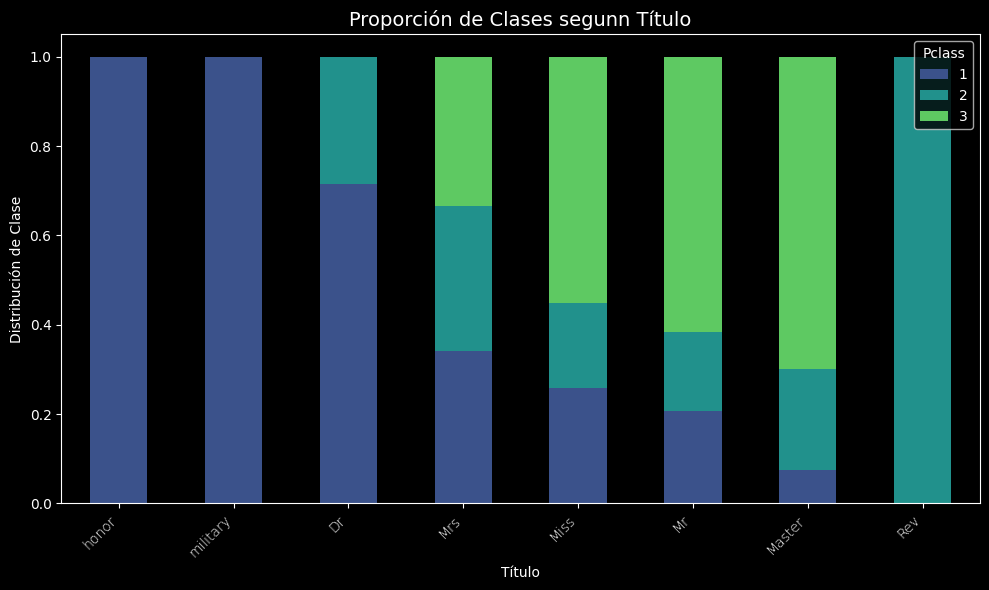

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt
class_by_title_cat = df_knn_age.groupby('Titulo')['Pclass'].value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)

# Usamos los colores de la paleta 'viridis' de Seaborn igual que el gráfico anterior
ax = class_by_title_cat.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', n_colors=3), figsize=(10, 6))

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')

plt.title('Proporción de Clases segunn Título', fontsize=14)
plt.xlabel('Título')
plt.ylabel('Distribución de Clase')
plt.tight_layout()

plt.show()



#### 5.4. Variables 'Fare' y 'Ticket'💲

##### 5.4.1. Free ride 

In [280]:
filas_fare_0 = df[df['Fare'] == 0]
print(filas_fare_0[['Pclass', 'Name','Age', 'Ticket','Fare']].sort_values(by='Pclass'))


     Pclass                              Name  Age  Ticket  Fare
263       1             Harrison, Mr. William   40  112059   0.0
633       1     Parr, Mr. William Henry Marsh   28  112052   0.0
806       1            Andrews, Mr. Thomas Jr   39  112050   0.0
815       1                  Fry, Mr. Richard   28  112058   0.0
822       1   Reuchlin, Jonkheer. John George   38   19972   0.0
277       2       Parkes, Mr. Francis "Frank"   28  239853   0.0
413       2    Cunningham, Mr. Alfred Fleming   28  239853   0.0
466       2             Campbell, Mr. William   28  239853   0.0
481       2  Frost, Mr. Anthony Wood "Archie"   28  239854   0.0
674       2        Watson, Mr. Ennis Hastings   28  239856   0.0
732       2              Knight, Mr. Robert J   28  239855   0.0
179       3               Leonard, Mr. Lionel   36    LINE   0.0
271       3      Tornquist, Mr. William Henry   25    LINE   0.0
302       3   Johnson, Mr. William Cahoone Jr   19    LINE   0.0
597       3              

Buscando información sobre porque había pasajeros que habían viajado gratis sin ser nobles o niños muy pequeños encontré la causa en que eran trabajadores enviados por los constructores de barcos Harlans & Wolf desde Belfast.

In [283]:
filas_line= df[df['Ticket'] == 'LINE']
filas_line[['Pclass', 'Name','Age', 'Ticket', 'Fare']].sort_values(by='Pclass')


,Pclass,Name,Age,Ticket,Fare
179,3,"Leonard, Mr. Lionel",36,LINE,0.0
271,3,"Tornquist, Mr. William Henry",25,LINE,0.0
302,3,"Johnson, Mr. William Cahoone Jr",19,LINE,0.0
597,3,"Johnson, Mr. Alfred",49,LINE,0.0


Todos los trabajadores listados como LINE eran personal destinado para el SS Philadelphia. El viaje de su barco fue cancelado debido a una huelga de trabajadores, por lo que fueron embarcados en el Titanic en Southampton. Su número de boleto real era 370160.

##### 5.3.2. Agrupación y descuentos en tarifa por tickets

Analizamos que distintos pasajeros tienen el mismo 'Ticket', vamos a comprobarlo

In [1]:
unique_tickets = df_knn_age['Ticket'].unique()
count = 0
max_alerts = 5

for ticket in unique_tickets:
    passengers_same_ticket = df_knn_age[df_knn_age['Ticket'] == ticket]
    
    if passengers_same_ticket['Fare'].nunique() != 1:
        print(f"¡Alerta! No todos los pasajeros con el boleto {ticket} tienen el mismo precio del billete.")
        count += 1
        if count >= max_alerts:
            break
    else:
        print(f"Todos los pasajeros con el boleto {ticket} tienen el mismo precio del billete.")



NameError: name 'df_knn_age' is not defined

Comprobamos que al repetirse los Tickets se aplican reducciones de precio por persona

In [34]:
# Obtener el número de repeticiones de cada número de boleto
ticket_repetitions = df_knn_age['Ticket'].value_counts()

# Agregar una columna al DataFrame que muestre el número de repeticiones de cada número de boleto
df_knn_age['Ticket_Repetitions'] = df_knn_age['Ticket'].map(ticket_repetitions)

# Contar el número de repeticiones de cada número de boleto
ticket_counts = df_knn_age['Ticket'].value_counts()

# Dividir el costo del billete por el número de repeticiones del boleto
df_knn_age['Fare_Per_Person'] = df_knn_age.apply(lambda row: row['Fare'] / ticket_counts[row['Ticket']], axis=1)

# Ver las primeras filas para verificar el resultado
print(df_knn_age[['Ticket', 'Ticket_Repetitions', 'Pclass', 'Fare', 'Fare_Per_Person']].head(5))



             Ticket  Ticket_Repetitions  Pclass     Fare  Fare_Per_Person
0         A/5 21171                   1       3   7.2500           7.2500
1          PC 17599                   1       1  71.2833          71.2833
2  STON/O2. 3101282                   1       3   7.9250           7.9250
3            113803                   2       1  53.1000          26.5500
4            373450                   1       3   8.0500           8.0500


Podemos conjeturar que se aplicaban descuentos por famílias o grupos

## 6. Conclusiones

**Género y supervivencia:**
- La media de edad de las pasajeras era mayor que la de los pasajeros.
- Las mujeres tenían una tasa de supervivencia significativamente mayor que los hombres.

**Clase de pasajero:**
- Los pasajeros de primera clase tuvieron una mayor tasa de supervivencia, lo que indica que el estatus socioeconómico influyó en las posibilidades de supervivencia.
- Los pasajeros más mayores son los de 1a clase. Y en general cada clase es más joven que la anterior.

**Puerto de embarque:**
- El recuento de supervivencia varió según el puerto de embarque.

**Distribución de tarifas:**
- La mayoría de los pasajeros pagaron tarifas  tercera clase. Además, se aplicaron descuentos por familias y grupos.

**Clase y supervivencia:**
- Los pasajeros que viajaron en 1a clase tuvieron una tasa de supervivencia superior a la de las clases más bajas.

**Hermanos/cónyuges:**
- Aquellos con un hermano o cónyuge a bordo parecían tener una tasa de supervivencia ligeramente mejor que aquellos que estaban solos o con muchos hermanos/cónyuges.

**Padres/hijos:**
- Los pasajeros que viajaban solos o con un padre/hijo tenían tasas de supervivencia más altas en comparación con las familias más numerosas.

**Títulos y supervivencia:**
- Ciertos títulos extraídos de nombres, que potencialmente indican estatus social o profesión, tuvieron tasas de supervivencia variadas.

**Distribución por edades:**
- Los pasajeros más jóvenes (niños) tuvieron una mejor tasa de supervivencia, mientras que los ancianos tuvieron menores posibilidades de supervivencia.
- La mayor parte de las víctimas fueron personas de mediana edad, especialmente hombres.

**Conclusión general:**
- Podríamos concluir que, si buscamos el algoritmo que diese con los factores requeridos para obtener la mayor posibilidad de supervivencia, y si consideramos cada parámetro por separado, parece que las mujeres jóvenes de primera clase con el título de Mrs., acompañadas de un número moderado de familiares y que embarcaron en Cherbourg, tenían mayores probabilidades de sobrevivir. Esto sugiere que la supervivencia no fue simplemente influenciada por el título, el costo del boleto o la edad en sí misma, sino por una combinación compleja de factores interrelacionados.
- Es claro que ningún algoritmo puede predecir con certeza del 100% la tasa de supervivencia basándose únicamente en la ubicación del pasajero en el barco o en su edad, ya que el factor humano y la inesperada emergencia también jugaron un papel crucial en el proceso de rescate.



## 7. Anexo

### 7.1. Definiciones de los títulos de los pasajeros

- **Master**: A finales del siglo XIX, la etiqueta establecía que los hombres fueran tratados como Mister y los niños como Master.
- **Mme**: Madame es un título de respeto en francés equivalente a "Sra." utilizado solo o antepuesto al nombre o título de una mujer casada. Se añadirá al grupo "Mrs".
- **Mlle**: Mademoiselle, abreviado como Mlle, es un título de cortesía francés otorgado tradicionalmente a una mujer soltera. El equivalente en inglés es "Miss". Se añadirá al grupo "Miss".
- **Dr.**: Doctor es un título académico.
- **Rev**.: Reverend es un título de cortesía comúnmente utilizado para referirse a ministros o pastores cristianos protestantes.
- **Capt.**: Captain es un título usado para el comandante de una unidad militar.
- **Major**: es un rango de oficial comisionado en el ejército.
- **Col.**: El título honorífico de Colonel es conferido por varios estados en Estados Unidos y algunas unidades militares de la Commonwealth.
- **Sir**: es un tratamiento honorífico formal en inglés para hombres, utilizado para aquellos que han sido nombrados caballeros, es decir, miembros de órdenes de caballería, y posteriormente también para baronets y otros cargos.
- **Countess**: es un título de nobleza histórico.
- **Lady**: es un título formal en el Reino Unido. Se utiliza para mujeres con títulos de nobleza o honorarios.
- **Jonkheer**: es un honorífico en los Países Bajos que denota el rango más bajo de la nobleza.
- **Don**: es un prefijo honorífico usado principalmente en España para hombres.
- **Dona**: La forma femenina de Don

### 7.2. Bibliografía

1. What is the rule for titles that come before your name (Mr, Mrs, Professor, etc.)? What sort of words can be used as such? What title wou. 
(Robert Charles Lee). Quora. https://www.quora.com/What-is-the-rule-for-titles-that-come-before-your-name-Mr-Mrs-Professor-etc-What-sort-of-words-can-be-used-as-such-What-title-would-you-give-someone-who-was-once-a-warrior-and-is-now-training-kids-to-be-ones-too

2. Wikipedia contributors. (s/f). Anexo:Tratamientos protocolarios de la monarquía y la nobleza. Wikipedia, The Free Encyclopedia. https://es.wikipedia.org/w/index.php?title=Anexo:Tratamientos_protocolarios_de_la_monarqu%C3%ADa_y_la_nobleza&oldid=160346951

3. (S/f). Encyclopedia-titanica.org. 1996-2024, de https://www.encyclopedia-titanica.org/titanic-guarantee-group/

4. Encyclopedia Titanica (2017) Andrew John Shannon (ref: # 974, last updated: 28th December 2017, accessed 12th June 2024 10:33:43 AM)
URL : https://www.encyclopedia-titanica.org/titanic-victim/lionel-leonard.html